In [83]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from boruta import BorutaPy
import xgboost
import shap
import interpret.glassbox
from sklearn.metrics import r2_score

In [30]:
df = pd.read_csv('Leo_B_data.csv', date_parser='date_P3T_56442')
df.shape

(360, 134)

In [31]:
df.head()

,Mean_OL_Y_52428,Mean_OL_Y_52274,Mean_P3AA_30_54742,Mean_P3AA_50_54742,Mean_P3AA210_55239,Mean_P3AA_55239,Mean_P3AA_B60_54742,Mean_P3AFRE_56321,Mean_P3AFTRB_54742,Mean_P3AFTRB_55239,...,Sigma_TTHK_79105,Sigma_TWP_ANG_57215,Sigma_XALOTHK_54758,Sigma_XFECOMP_53116,Sigma_XFECOMP_54061,Sigma_XFECOMP_57128,Sigma_XFECOMP_57544,Sigma_XFECOMP_79098,Sigma_XNICRTHK_52241,OW_C
0,-0.051113,0.166269,18.969707,15.782681,14.952524,16.394078,14.500243,60.957006,0.316141,0.243296,...,31.345869,0.607041,0.210618,0.172117,0.108106,0.065094,0.084623,0.255503,0.376473,33.589796
1,-0.048337,0.167523,18.951498,15.973496,14.437239,15.532103,14.932719,60.411585,0.311678,0.246579,...,21.510769,0.647112,0.298728,0.086519,0.089071,0.056134,0.185076,0.257406,0.537332,33.206470
2,-0.048634,0.165922,17.380272,16.233524,14.774068,18.963906,15.486491,59.663349,0.312834,0.256484,...,35.590730,1.097795,0.278303,0.190641,0.030553,0.060808,0.113164,0.233668,0.669315,28.930748
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,58.692460,NaN,NaN,...,24.415491,1.997376,0.401029,0.129651,NaN,0.052869,0.122809,0.239398,0.830752,30.037016
4,-0.050635,0.159810,19.486130,16.966748,14.888084,20.109170,15.368267,59.458997,0.300530,0.249101,...,19.752477,0.555923,0.320674,0.156613,0.103038,0.158084,0.089977,0.091470,0.876070,33.103786


In [32]:
df.sort_values(by='date_P3T_56442', inplace=True)
df.reset_index(drop=True, inplace=True)
df.head()

,Mean_OL_Y_52428,Mean_OL_Y_52274,Mean_P3AA_30_54742,Mean_P3AA_50_54742,Mean_P3AA210_55239,Mean_P3AA_55239,Mean_P3AA_B60_54742,Mean_P3AFRE_56321,Mean_P3AFTRB_54742,Mean_P3AFTRB_55239,...,Sigma_TTHK_79105,Sigma_TWP_ANG_57215,Sigma_XALOTHK_54758,Sigma_XFECOMP_53116,Sigma_XFECOMP_54061,Sigma_XFECOMP_57128,Sigma_XFECOMP_57544,Sigma_XFECOMP_79098,Sigma_XNICRTHK_52241,OW_C
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,58.692460,NaN,NaN,...,24.415491,1.997376,0.401029,0.129651,NaN,0.052869,0.122809,0.239398,0.830752,30.037016
1,-0.051113,0.166269,18.969707,15.782681,14.952524,16.394078,14.500243,60.957006,0.316141,0.243296,...,31.345869,0.607041,0.210618,0.172117,0.108106,0.065094,0.084623,0.255503,0.376473,33.589796
2,-0.048170,0.165531,NaN,NaN,14.044750,17.311499,NaN,59.733416,NaN,0.249240,...,21.326199,0.619653,0.326242,0.164529,0.063211,0.070426,0.082508,0.154293,0.728232,35.794502
3,-0.048192,0.166145,NaN,NaN,NaN,NaN,NaN,60.749146,NaN,NaN,...,21.889648,0.383701,0.292210,0.164148,0.070539,0.054695,0.088134,0.221384,0.707835,34.499050
4,-0.048222,0.162561,NaN,NaN,13.927248,17.564915,NaN,59.745836,NaN,0.253640,...,27.750141,0.629859,0.292210,0.166637,0.095084,0.054695,0.134799,0.208194,0.738244,35.250375


In [33]:
df['date_P3T_56442']

0      2020-03-08
1      2020-03-11
2      2020-04-05
3      2020-04-08
4      2020-04-08
          ...    
355    2021-12-08
356    2021-12-09
357    2021-12-09
358    2022-01-10
359    2022-02-05
Name: date_P3T_56442, Length: 360, dtype: object

In [37]:
df['date_P3T_56442'][:15]

0     2020-03-08
1     2020-03-11
2     2020-04-05
3     2020-04-08
4     2020-04-08
5     2020-04-11
6     2020-09-04
7     2020-09-17
8     2020-10-14
9     2020-10-15
10    2020-10-17
11    2020-10-25
12    2020-10-25
13    2020-10-28
14    2020-11-07
Name: date_P3T_56442, dtype: object

In [38]:
df = df.loc[df['date_P3T_56442'] >= '2020-10-14']
df.reset_index(drop=True, inplace=True)
df.head()

,Mean_OL_Y_52428,Mean_OL_Y_52274,Mean_P3AA_30_54742,Mean_P3AA_50_54742,Mean_P3AA210_55239,Mean_P3AA_55239,Mean_P3AA_B60_54742,Mean_P3AFRE_56321,Mean_P3AFTRB_54742,Mean_P3AFTRB_55239,...,Sigma_TTHK_79105,Sigma_TWP_ANG_57215,Sigma_XALOTHK_54758,Sigma_XFECOMP_53116,Sigma_XFECOMP_54061,Sigma_XFECOMP_57128,Sigma_XFECOMP_57544,Sigma_XFECOMP_79098,Sigma_XNICRTHK_52241,OW_C
0,-0.047358,0.165306,16.629621,14.588550,13.848421,15.138143,14.397602,60.197104,0.305534,0.249566,...,38.805780,0.862757,0.485813,0.173820,0.029985,0.089905,0.188104,0.244911,0.403675,34.006955
1,-0.051526,0.164772,17.061036,15.601762,14.151450,17.415212,15.061582,60.030062,0.301985,0.241809,...,40.579674,0.400269,0.256324,0.074669,0.068540,0.137533,0.077278,0.255340,0.479784,35.918285
2,-0.050212,0.162827,15.518632,15.189948,13.877424,18.197540,14.795141,59.903221,0.303169,0.249849,...,21.999692,0.533094,0.292510,0.135859,0.044918,0.071233,0.189065,0.232394,0.479784,35.569208
3,-0.048834,0.165049,17.727652,16.542913,13.785611,17.936426,15.008017,60.744650,0.316784,0.247766,...,28.591785,0.827270,0.172542,0.130488,0.069204,0.123258,0.184253,0.285685,0.780451,35.804802
4,-0.047856,0.164602,16.877023,15.700052,14.326572,19.580275,15.324036,60.438254,0.292145,0.247985,...,33.682800,0.632015,0.172542,0.205116,0.025248,0.123258,0.199209,0.378519,0.780451,37.834941


In [39]:
df.shape

(352, 134)

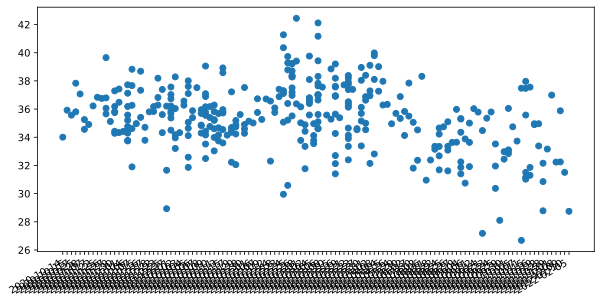

In [40]:
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='svg'

fig, ax = plt.subplots(figsize=(10, 5), sharex=True, sharey=True)
# fig, ax = plt.subplots(1, 1, , sharex=True, sharey=True)
plt.scatter(df['date_P3T_56442'], df['OW_C']);
# plt.plot(df['date_P3T_56442'], df['OW_C']);
fig.autofmt_xdate()

In [42]:
df.isna().sum().sort_values(ascending=False)[:50]

Sigma_OL_Y_57600             196
Mean_OL_Y_57600              196
Mean_K5F_31717               164
Sigma_K3F_32213              164
Sigma_K5F_31717              164
Sigma_THK_31451              164
Mean_K3F_32213               164
Mean_THK_31451               164
Mean_THK_79341                92
Sigma_THK_79341               92
Sigma_P3AA_30_54742           54
Mean_P3AA_30_54742            41
Mean_XFECOMP_54768             3
Mean_XALOTHK_54758             3
Mean_RES_79399                 3
Sigma_XALOTHK_54758            3
Sigma_RES_79399                3
Sigma_XFECOMP_54768            3
Sigma_P3AA_50_54742            2
Sigma_P3AA_B60_54742           2
Sigma_P3ATR_54742              2
Sigma_P3A_54742                2
Sigma_P3AFTRB_54742            2
Sigma_P3ATOP_54742             2
Sigma_P3A_200_54742            2
Sigma_THK_78930                2
Sigma_P3T_ABS_54742            2
Sigma_OL_Y_76308               2
Mean_THK_78930                 2
Mean_P3A_200_54742             2
Mean_P3AFT

In [43]:
164/352

0.4659090909090909

In [45]:
missing_var = [var for var in df.columns if df[var].isna().mean() > 0.45]
df.drop(missing_var, axis=1, inplace=True)
df.shape

(352, 126)

In [46]:
missing_feat = [var for var in df.columns if df[var].isna().mean() > 0]
for var in missing_feat:
    df[var].fillna(df[var].median(), inplace=True)

In [47]:
df.isna().sum().sum()

0

In [81]:
df.to_csv('Leo_B_order.csv', index=False)

In [50]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(['OW_C', 'date_P3T_56442'], axis=1),
                                              df['OW_C'],
                                              test_size = 0.3,
                                              random_state = 1)

X_train.shape, X_test.shape

((246, 124), (106, 124))

In [51]:
# feature selection
from sklearn.ensemble import GradientBoostingRegressor
from boruta import BorutaPy

boruta = BorutaPy(estimator = GradientBoostingRegressor(),
                 n_estimators = 'auto',
                 max_iter = 100)
boruta.fit(X_train.values, y_train.values.ravel())

boruta_support = X_train.columns[boruta.support_].to_list()
boruta_support_weak = X_train.columns[boruta.support_weak_].to_list()

In [52]:
len(boruta_support), len(boruta_support_weak)

(22, 6)

In [53]:
boruta_select = boruta_support + boruta_support_weak
boruta_select

['Mean_P3AA_30_54742',
 'Mean_P3A_55331',
 'Mean_P3A_55388',
 'Mean_P3A_56442',
 'Mean_P3T_ABS_54742',
 'Mean_P3TBACK_55351',
 'Mean_P3TBACK_55499',
 'Mean_P3T_56442',
 'Mean_XFECOMP_54768',
 'Sigma_P3A_54742',
 'Sigma_P3A_56321',
 'Mean_RES_79399',
 'Mean_AL2O3T_55239',
 'Mean_LET_SH_52286',
 'Mean_RUTHK_54744',
 'Mean_THK_56320',
 'Sigma_RES_79399',
 'Sigma_ECS_79363',
 'Sigma_STA_55388',
 'Sigma_TTHK_79105',
 'Sigma_XALOTHK_54758',
 'Sigma_XFECOMP_54061',
 'Mean_P3A_56321',
 'Mean_P3A_ABS_54742',
 'Mean_P3AGO_56322',
 'Mean_ECS_79690',
 'Mean_RECESSION_55239',
 'Mean_TWP_ANG_57215']

In [84]:
# adjust hyper-parameters
xgb_model = xgboost.XGBRegressor()
clf = GridSearchCV(xgb_model,
                   {'max_depth': range(3,8),
                    'n_estimators': [50, 100, 150, 200, 500, 1000],
                    'learning_rate': [0.01, 0.05, 0.1],
                    'subsample' : [0.4, 0.5, 0.6]
                   },
                   verbose=1,
                   cv = 3)
clf.fit(X_train[boruta_support],y_train)
print(clf.best_score_)
print(clf.best_params_)

Fitting 3 folds for each of 270 candidates, totalling 810 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pa

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated an

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated an

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated an

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated an

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated an

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated an

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated an

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated an

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated an

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated an

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated an

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated an

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated an

0.6237358864469899
{'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 1000, 'subsample': 0.4}


In [92]:
xgb = xgboost.XGBRegressor(n_estimators=1000,
                          max_depth=3,
                          learning_rate=0.01,
                          subsample=0.4,
                          random_state=22)

xgb.fit(X_train[boruta_support], y_train)
y_pred_train = xgb.predict(X_train[boruta_support])
y_pred_test = xgb.predict(X_test[boruta_support])

print('training R2:{:.2f}'.format(r2_score(y_train, y_pred_train)))
print('testing R2:{:.2f}'.format(r2_score(y_test, y_pred_test)))

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


training R2:0.96
testing R2:0.72


pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


特征排序：
特征 Sigma_P3A_56321 重要度为 0.110061
特征 Sigma_P3A_54742 重要度为 0.101014
特征 Sigma_XFECOMP_54061 重要度为 0.076263
特征 Mean_P3TBACK_55351 重要度为 0.052309
特征 Mean_P3T_56442 重要度为 0.051921
特征 Mean_AL2O3T_55239 重要度为 0.050690
特征 Sigma_STA_55388 重要度为 0.048870
特征 Mean_P3TBACK_55499 重要度为 0.046492
特征 Mean_THK_56320 重要度为 0.045749
特征 Mean_P3A_55388 重要度为 0.045362


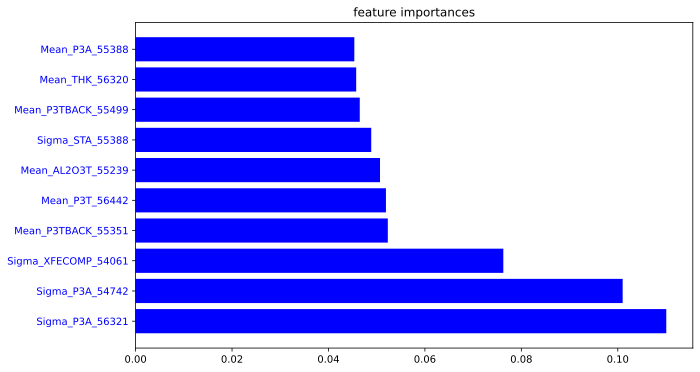

<Figure size 432x288 with 0 Axes>

In [123]:
# feature importance
features_name = boruta_support
print('特征排序：')

feature_importances = xgb.feature_importances_
indices = np.argsort(feature_importances)[::-1]
indices = indices[:10]

for index in indices:
    print("特征 %s 重要度为 %f" %(features_name[index], feature_importances[index]))


plt.figure(figsize=(10,6))
plt.title("feature importances")
plt.barh(range(len(indices)), feature_importances[indices], color='b')
plt.yticks(range(len(indices)), np.array(features_name)[indices], color='b')
plt.show()
plt.savefig('Feature_importance_xgboost.jpg')

In [94]:
X = df.drop(['OW_C', 'date_P3T_56442'], axis=1)
y = df['OW_C']

In [95]:
# explain the GAM model with SHAP
explainer_xgb = shap.Explainer(xgb, X_train[boruta_support])
shap_values_xgb = explainer_xgb(X[boruta_support])

In [96]:
xgb.predict(X[boruta_support]).mean()

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


35.411266

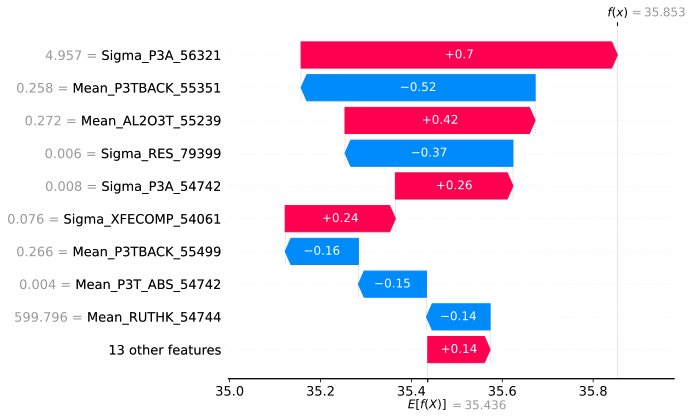

In [137]:
shap.plots.waterfall(shap_values_xgb[291], max_display=10)